## Load CIFAR-10 dataset

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


Using TensorFlow backend.


## Create Model

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same',
           activation='relu', input_shape=(32,32, 3)),
    MaxPooling2D(2, 2),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

## Training the model

In [3]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train,          
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 14s 283us/step - loss: 1.5485 - accuracy: 0.4427
Epoch 2/10
50000/50000 [==============================] - 10s 203us/step - loss: 1.1927 - accuracy: 0.5806
Epoch 3/10
50000/50000 [==============================] - 10s 206us/step - loss: 1.0510 - accuracy: 0.6320
Epoch 4/10
50000/50000 [==============================] - 11s 221us/step - loss: 0.9562 - accuracy: 0.6652
Epoch 5/10
50000/50000 [==============================] - 10s 209us/step - loss: 0.8909 - accuracy: 0.6881
Epoch 6/10
50000/50000 [==============================] - 12s 237us/step - loss: 0.8336 - accuracy: 0.7092
Epoch 7/10
50000/50000 [==============================] - 11s 229us/step - loss: 0.7880 - accuracy: 0.7257
Epoch 8/10
50000/50000 [==============================] - 10s 201us/step - loss: 0.7499 - accuracy: 0.7388
Epoch 9/10
50000/50000 [==============================] - 11s 225us/step - loss: 0.7193 - accuracy: 0.7505
Epoch 10/10
50000/50000 [============

## Evaluating the model

In [4]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 102us/step


[0.8206713027954101, 0.7206000089645386]

In [5]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

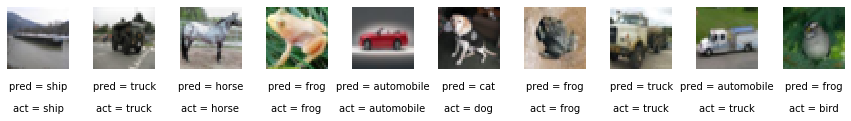

In [6]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)